In [2]:
from perceptron import *

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Read data into a DataFrame
data = pd.read_table("data.txt", delimiter=',', header=None, names=['x1', 'x2', 'y'])

# Separate features (X) and target (y)
X = data[['x1', 'x2']].values
y = data['y'].values
y = np.array(data['y'].values, dtype=np.float32)
X = np.insert(X, 0, 1, axis=1)
# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of each set
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (3600, 3) (3600,)
Validation set: (450, 3) (450,)
Test set: (450, 3) (450,)


In [21]:
X

array([[ 1.      ,  4.78031 ,  2.69832 ],
       [ 1.      , -2.27371 ,  5.75018 ],
       [ 1.      , -4.81717 , -2.20961 ],
       ...,
       [ 1.      , -2.37735 , -3.07813 ],
       [ 1.      ,  0.508152,  0.432983],
       [ 1.      , -0.641549, -1.35571 ]], dtype=float32)

Epoch 0 Error: 0.5
Epoch 10 Error: 0.675
Epoch 20 Error: 0.4866666666666667
Epoch 30 Error: 0.49722222222222223


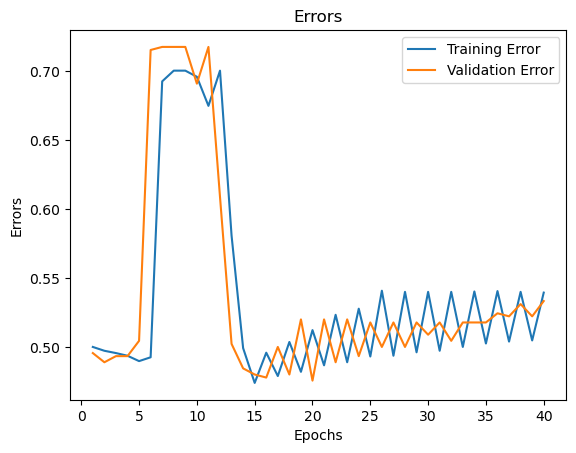

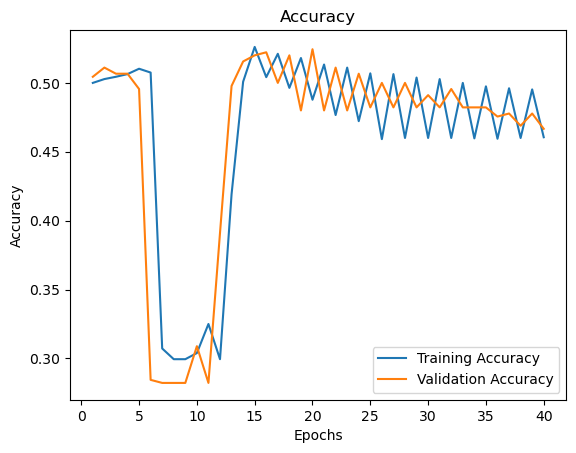


----------------------------------------------



In [27]:
perceptron = Perceptron(alpha=0.1, epochs=40)
perceptron.train(X_train, y_train, X_val, y_val)
perceptron.plot_learning_curve()
perceptron.plot_accuracy_curve()
print("\n----------------------------------------------\n")

Metrics for Training Data:

Metrics for Validation Data:

Metrics for Test Data:


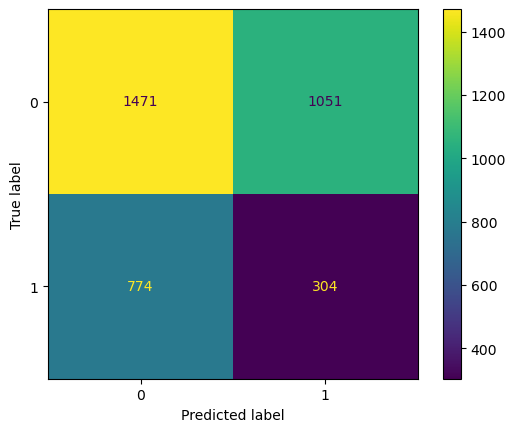

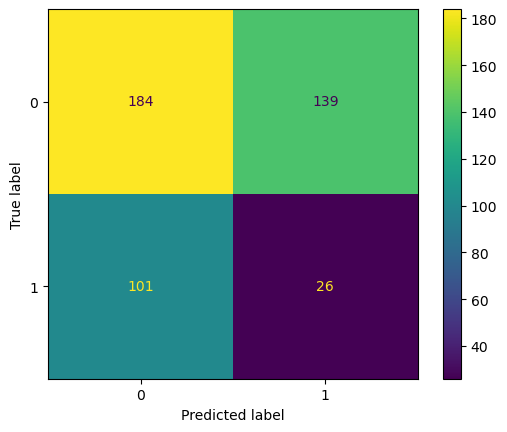

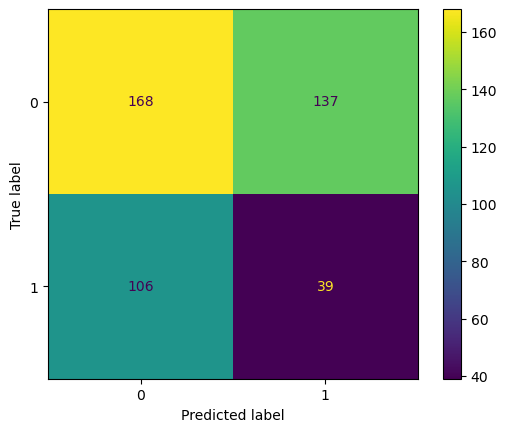

In [28]:
print("Metrics for Training Data:")
perceptron.plot_confusion_matrix(y_train, perceptron.predict(X_train))
print("\nMetrics for Validation Data:")
perceptron.plot_confusion_matrix(y_val,perceptron.predict(X_val))
print("\nMetrics for Test Data:")
perceptron.plot_confusion_matrix(y_test, perceptron.predict(X_test))

In [29]:
from sklearn.metrics import accuracy_score, f1_score
        # Calculate accuracy and F1-score
accuracy_train_score = accuracy_score(y_train, perceptron.predict(X_train))
f1_train_score = f1_score(y_train, perceptron.predict(X_train))

print(f"Accuracy for Train Data: {accuracy_train_score:.4f}")
print(f"F1-score for Train Data: {f1_train_score:.4f}")

accuracy_validation_score = accuracy_score(y_val, perceptron.predict(X_val))
f1_validation_score = f1_score(y_val, perceptron.predict(X_val))

print(f"Accuracy for Validation Data: {accuracy_validation_score:.4f}")
print(f"F1-score for Validation Data: {f1_validation_score:.4f}")

accuracy_test_score = accuracy_score(y_test, perceptron.predict(X_test))
f1_test_score = f1_score(y_test, perceptron.predict(X_test))

print(f"Accuracy for Test Data: {accuracy_test_score:.4f}")
print(f"F1-score for Test Data: {f1_test_score:.4f}")

Accuracy for Train Data: 0.4931
F1-score for Train Data: 0.2499
Accuracy for Validation Data: 0.4667
F1-score for Validation Data: 0.1781
Accuracy for Test Data: 0.4600
F1-score for Test Data: 0.2430


In [30]:
print("weights of the perceptron after training")
print("\n")
for i, weight in enumerate(perceptron.w):
    print(f"w{i} : {weight}")

weights of the perceptron after training


w0 : -0.19725401863209238
w1 : 0.034725863066346424
w2 : -0.11025430833193417
